In [50]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# loading the dataset
df = pd.read_csv("movieratings.csv")
print(df.head)

<bound method NDFrame.head of                                                     text  label
0      I grew up (b. 1965) watching and loving the Th...      0
1      When I put this movie in my DVD player, and sa...      0
2      Why do people who do not know what a particula...      0
3      Even though I have great interest in Biblical ...      0
4      Im a die hard Dads Army fan and nothing will e...      1
...                                                  ...    ...
39995  "Western Union" is something of a forgotten cl...      1
39996  This movie is an incredible piece of work. It ...      1
39997  My wife and I watched this movie because we pl...      0
39998  When I first watched Flatliners, I was amazed....      1
39999  Why would this film be so good, but only gross...      1

[40000 rows x 2 columns]>


In [9]:
# looking for duplicates and removing if any
duplicates = df[df.duplicated()]
print(f"total duplicate rows: {len(duplicates)}")
df = df.drop_duplicates()
duplicates = df[df.duplicated()]
print(f"total duplicate rows: {len(duplicates)}")

Total duplicate rows: 277
Total duplicate rows: 0


removed duplicate rows

In [14]:
# checking for nan values
nan_values = df.isna().sum().sum()
print(f"nan values : {nan_values}")

nan values : 0


no nan values

In [17]:
# checking for label uniqueness
print(f"unique labels : {df['label'].unique()}")

unique labels : [0 1]


only two unique labels : 0,1

In [19]:
# checking if the data is balanced
df["label"].value_counts()

,count
label,
1,19908
0,19815


Data not imbalanced clearly

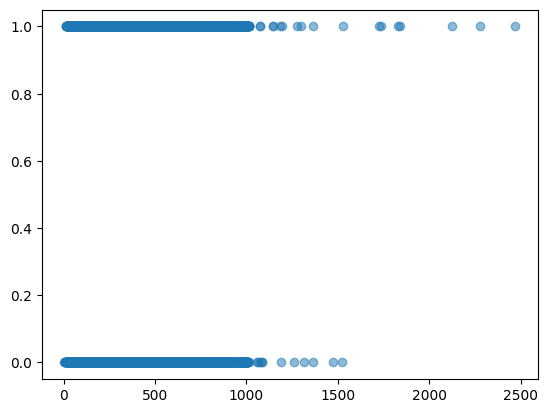

In [26]:
# checking if there's a relation between the length of review and label
df['len_reviews'] = df['text'].apply(lambda x: len(x.split()))
plt.scatter(df['len_reviews'], df['label'], alpha = 0.5)
plt.show()

no clear relation between length of text and label

In [37]:
# removing stopwords
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text.lower())  # tokenize and lowercase
    filtered = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(filtered)

df['cleaned_text'] = df['text'].apply(remove_stopwords)

print(df.head)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<bound method NDFrame.head of                                                     text  label  len_reviews  \
0      I grew up (b. 1965) watching and loving the Th...      0          151   
1      When I put this movie in my DVD player, and sa...      0          326   
2      Why do people who do not know what a particula...      0          184   
3      Even though I have great interest in Biblical ...      0           69   
4      Im a die hard Dads Army fan and nothing will e...      1          178   
...                                                  ...    ...          ...   
39995  "Western Union" is something of a forgotten cl...      1          541   
39996  This movie is an incredible piece of work. It ...      1           50   
39997  My wife and I watched this movie because we pl...      0          168   
39998  When I first watched Flatliners, I was amazed....      1          168   
39999  Why would this film be so good, but only gross...      1          137   

         

In [42]:
# cleaning the text by removing unnecessary characters
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()

    return text

df['cleaned_text'] = df['cleaned_text'].apply(clean_text)

print(df.head)

<bound method NDFrame.head of                                                     text  label  len_reviews  \
0      I grew up (b. 1965) watching and loving the Th...      0          151   
1      When I put this movie in my DVD player, and sa...      0          326   
2      Why do people who do not know what a particula...      0          184   
3      Even though I have great interest in Biblical ...      0           69   
4      Im a die hard Dads Army fan and nothing will e...      1          178   
...                                                  ...    ...          ...   
39995  "Western Union" is something of a forgotten cl...      1          541   
39996  This movie is an incredible piece of work. It ...      1           50   
39997  My wife and I watched this movie because we pl...      0          168   
39998  When I first watched Flatliners, I was amazed....      1          168   
39999  Why would this film be so good, but only gross...      1          137   

         

In [44]:
# lemmatizing the text
import spacy
nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if token.is_alpha])

df['cleaned_text'] = df['cleaned_text'].apply(lemmatize_text)
print(df.head)

<bound method NDFrame.head of                                                     text  label  len_reviews  \
0      I grew up (b. 1965) watching and loving the Th...      0          151   
1      When I put this movie in my DVD player, and sa...      0          326   
2      Why do people who do not know what a particula...      0          184   
3      Even though I have great interest in Biblical ...      0           69   
4      Im a die hard Dads Army fan and nothing will e...      1          178   
...                                                  ...    ...          ...   
39995  "Western Union" is something of a forgotten cl...      1          541   
39996  This movie is an incredible piece of work. It ...      1           50   
39997  My wife and I watched this movie because we pl...      0          168   
39998  When I first watched Flatliners, I was amazed....      1          168   
39999  Why would this film be so good, but only gross...      1          137   

         

In [67]:
# downloading en_core_web_md for vectorization of reviews
import spacy.cli
spacy.cli.download("en_core_web_md")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [68]:
# loading the nlp library
nlp = spacy.load("en_core_web_md")

In [71]:
# vectorizing the reviews
from tqdm import tqdm
tqdm.pandas()
df['vector'] = df['cleaned_text'].progress_apply(lambda x: nlp(x).vector)
print(df['vector'].iloc[0].shape)
print(df['vector'].iloc[0])

100%|██████████| 39723/39723 [20:04<00:00, 32.98it/s]

(300,)
[-7.09629834e-01  1.22158900e-01 -9.91385654e-02 -8.07539076e-02
 -1.04077160e-01  3.42948153e-03  1.16117015e-01 -1.18513957e-01
  5.97070456e-02  1.49176621e+00 -1.54117614e-01 -1.19294904e-01
 -3.63938510e-02  1.13093331e-01 -2.30300352e-02 -6.19464666e-02
  5.44701703e-02  5.99474967e-01 -4.30958979e-02 -5.24709634e-02
  3.91380601e-02 -9.66591910e-02  3.70458327e-02 -1.47593737e-01
 -1.00427419e-02  3.26104797e-02 -3.09333242e-02 -8.26772526e-02
  5.53701222e-02 -4.69258763e-02 -9.01975408e-02  9.06382501e-02
 -5.55830970e-02 -1.59291849e-02 -7.65019096e-03  1.61268443e-01
 -7.53017142e-02  9.35877860e-02 -1.31062195e-01 -1.32117942e-02
 -4.42769891e-03 -3.11148986e-02  1.19845755e-02  1.65880248e-01
  7.00580627e-02 -1.56036858e-02 -4.79841530e-02  1.08946331e-01
  2.74239928e-02 -3.35404091e-02  3.13756950e-02  6.35560378e-02
  1.36722088e-01 -1.04713157e-01 -9.75752026e-02  4.76600714e-02
 -5.08321598e-02 -6.54309243e-02 -4.35665622e-02 -7.91243836e-02
 -1.14424817e-01 -

In [83]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X = np.stack(df['vector'].values)
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [78]:
# forming the evaluation pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix
import seaborn as sns

def evaluate_predictions(y_test, y_pred, y_proba=None, model_name="Model"):
    print(f"\n Evaluation Metrics for: {model_name}")

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy Score : {acc:.4f}")
    print(f"F1 Score       : {f1:.4f}")

    if y_proba is not None:
        try:
            auc = roc_auc_score(y_test, y_proba)
            print(f"ROC-AUC Score  : {auc:.4f}")
        except ValueError:
            print("ROC-AUC could not be computed (possibly only one class in y_test).")
    else:
        print("Skipping ROC-AUC (no probability scores provided).")

    # Confusion Matrix Plot
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


 Evaluation Metrics for: Random Forest
Accuracy Score : 0.7249
F1 Score       : 0.7261
ROC-AUC Score  : 0.8001


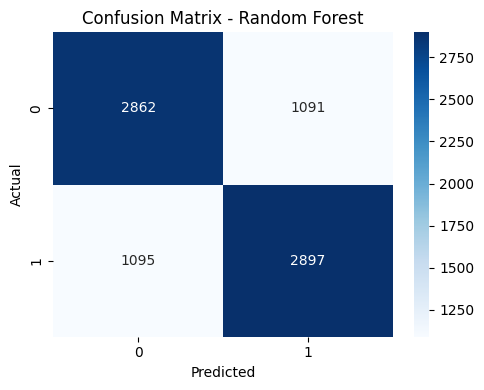

In [79]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier as RFC
rf_model = RFC(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

evaluate_predictions(y_test, y_pred, y_proba, model_name="Random Forest")


 Evaluation Metrics for: Logistic Regression
Accuracy Score : 0.7806
F1 Score       : 0.7812
ROC-AUC Score  : 0.8588


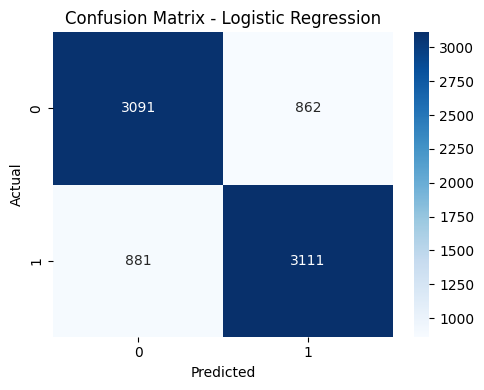

In [80]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]
evaluate_predictions(y_test, y_pred, y_proba, model_name="Logistic Regression")


 Evaluation Metrics for: SVM
Accuracy Score : 0.7762
F1 Score       : 0.7762
ROC-AUC Score  : 0.8592


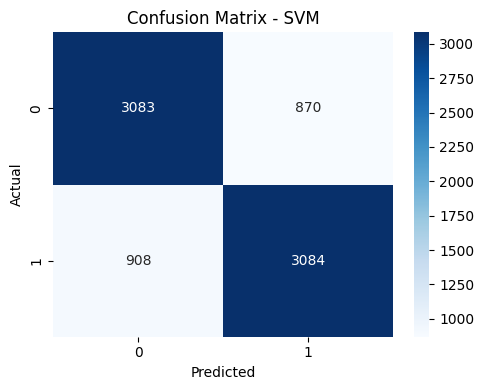

In [81]:
# SVM Model
from sklearn.svm import SVC

svm_model = SVC(probability=True, random_state=69)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
y_proba = svm_model.predict_proba(X_test)[:, 1]
evaluate_predictions(y_test, y_pred, y_proba, model_name="SVM")


 Evaluation Metrics for: Bernoulli Naive Bayes
Accuracy Score : 0.6544
F1 Score       : 0.6297
ROC-AUC Score  : 0.7196


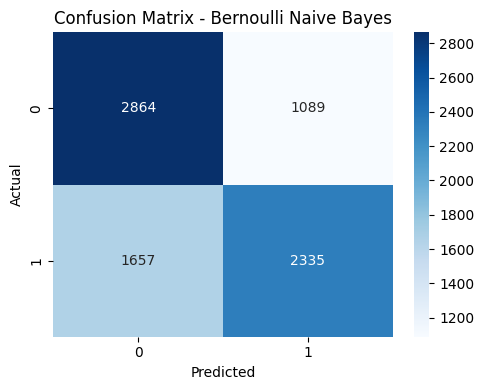

In [84]:
#Bernoulli Naive Bayes Classifier
from sklearn.naive_bayes import BernoulliNB

nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
y_proba = nb_model.predict_proba(X_test)[:, 1]
evaluate_predictions(y_test, y_pred, y_proba, model_name="Bernoulli Naive Bayes")

Epoch 1/30, Loss: 273.4864
Epoch 2/30, Loss: 244.3730
Epoch 3/30, Loss: 238.8992
Epoch 4/30, Loss: 234.5859
Epoch 5/30, Loss: 233.0220
Epoch 6/30, Loss: 232.7124
Epoch 7/30, Loss: 229.7373
Epoch 8/30, Loss: 229.7636
Epoch 9/30, Loss: 227.1971
Epoch 10/30, Loss: 226.3030
Epoch 11/30, Loss: 224.5446
Epoch 12/30, Loss: 225.0341
Epoch 13/30, Loss: 223.1278
Epoch 14/30, Loss: 222.6758
Epoch 15/30, Loss: 221.2945
Epoch 16/30, Loss: 220.8817
Epoch 17/30, Loss: 220.3088
Epoch 18/30, Loss: 217.8594
Epoch 19/30, Loss: 218.7886
Epoch 20/30, Loss: 217.8885
Epoch 21/30, Loss: 216.2804
Epoch 22/30, Loss: 217.1274
Epoch 23/30, Loss: 215.8012
Epoch 24/30, Loss: 214.3835
Epoch 25/30, Loss: 213.9020
Epoch 26/30, Loss: 212.6485
Epoch 27/30, Loss: 212.8050
Epoch 28/30, Loss: 210.8528
Epoch 29/30, Loss: 211.3133
Epoch 30/30, Loss: 210.3862

 Evaluation Metrics for: PyTorch Simple NN
Accuracy Score : 0.7853
F1 Score       : 0.7790
ROC-AUC Score  : 0.8641


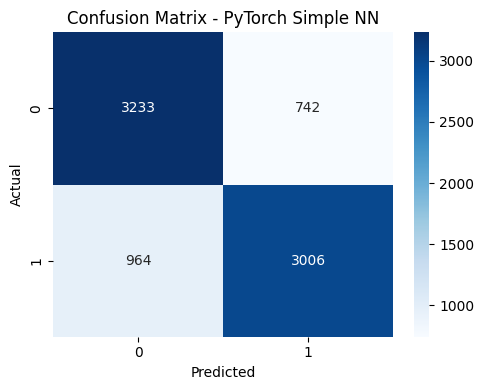

In [90]:
# Simple Pytorch Neural Network with 2 hidden layers
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

model = SimpleNN(input_dim=X.shape[1]).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 30
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")

model.eval()
y_pred_list = []
y_proba_list = []
y_true_list = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.to(device)
        outputs = model(batch_X)
        proba = outputs.cpu().numpy().flatten()
        preds = (proba >= 0.5).astype(int)

        y_pred_list.extend(preds)
        y_proba_list.extend(proba)
        y_true_list.extend(batch_y.numpy().flatten())

evaluate_predictions(
    y_test=np.array(y_true_list),
    y_pred=np.array(y_pred_list),
    y_proba=np.array(y_proba_list),
    model_name="PyTorch Simple NN"
)